In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Supermarket Customers.csv', delimiter="\t")
display(df.head(10),df.tail(10))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2230,7004,1984,Graduation,Single,11012.0,1,0,16-03-2013,82,24,...,9,1,0,0,0,0,0,3,11,0
2231,9817,1970,Master,Single,44802.0,0,0,21-08-2012,71,853,...,8,0,0,0,0,0,0,3,11,0
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,...,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,...,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)


In [5]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [6]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 2013-08-21 00:00:00, 2014-02-10 00:00:00, 2014-01-19 00:00:00, 2013-09-09 00:00:00, 2012-11-13 00:00:00, 2013-05-08 00:00:00, 2013-06-06 00:00:00, 2014-03-13 00:00:00, 2013-11-15 00:00:00, 2012-10-10 00:00:00, 2012-11-24 00:00:00, 2012-12-24 00:00:00, 2012-08-31 00:00:00, 2013-03-28 00:00:00, 2012-11-03 00:00:00, 2012-08-08 00:00:00, 2013-01-06 00:00:00, 2012-12-23 00:00:00, 2014-01-11 00:00:00, 2013-03-18 00:00:00, 2013-01-02 00:00:00, 2013-05-27 00:00:00, 2013-02-20 00:00:00, 2013-05-31 00:00:00, 2013-11-22 00:00:00, 2014-05-22 00:00:00, 2013-05-11 00:00:00, 2012-10-29 00:00:00, 2013-08-29 00:00:00, 2013-12-31 00:00:00, 2013-09-02 00:00:00, 2014-02-11 00:00:00, 2013-02-01 00:00:00, 2013-04-29 00:00:00, 2013-03-12 00:00:00, 2013-11-05 00:00:00, 2013-10-02 00:00:00, 2014-06-28 00:00:00, 2012-11-09 00:00:00, 2013-05-24 00:00:00, 2014-01-01 00:00:00, 2012-11-08 00:00:00, 2014-05-12 00:00:00, 2012-08-11 00:00:00, 2014-06-07 00:00:00, 2013-06-12 00:00:00, 2012-11-19 00:00:00, 2013-04-02 00:00:00, 2014-04-28 00:00:00, 2013-06-17 00:00:00, 2014-03-03 00:00:00, 2013-07-04 00:00:00, 2012-09-07 00:00:00, 2013-02-18 00:00:00, 2013-06-11 00:00:00, 2013-12-06 00:00:00, 2013-05-21 00:00:00, 2014-05-11 00:00:00, 2014-03-19 00:00:00, 2013-09-27 00:00:00, 2013-04-08 00:00:00, 2012-09-11 00:00:00, 2012-09-14 00:00:00, 2013-03-17 00:00:00, 2013-04-05 00:00:00, 2014-04-30 00:00:00, 2012-12-19 00:00:00, 2012-08-27 00:00:00, 2012-10-12 00:00:00, 2013-09-04 00:00:00, 2012-08-29 00:00:00, 2013-06-23 00:00:00, 2013-07-03 00:00:00, 2014-02-25 00:00:00, 2013-08-11 00:00:00, 2013-07-16 00:00:00, 2014-05-28 00:00:00, 2014-01-21 00:00:00, 2014-05-27 00:00:00, 2013-11-23 00:00:00, 2014-03-23 00:00:00, 2014-05-24 00:00:00, 2012-11-22 00:00:00, 2013-04-11 00:00:00, 2013-12-01 00:00:00, 2013-06

Missing Value

In [7]:
# Menghitung banyak nilai kosong tiap kolom
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# Cek duplikat berdasarkan ID
df.duplicated(subset='ID').sum()


0

In [9]:
# Handling Missing Value
df["Income"] = df["Income"].fillna(df["Income"].median())

numeric_cols = df.select_dtypes(include=['int64','float64']).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    outlier_summary[col] = {
        "Jumlah Outlier": len(outliers),
        "Persentase Outlier": round(100*len(outliers)/len(df),2),
        "Batas Bawah": lower,
        "Batas Atas": upper
    }

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df


,Jumlah Outlier,Persentase Outlier,Batas Bawah,Batas Atas
ID,0.0,0.00,-5571.00,16827.00
Year_Birth,3.0,0.13,1932.00,2004.00
Income,8.0,0.36,-13587.75,117416.25
Kidhome,0.0,0.00,-1.50,2.50
Teenhome,0.0,0.00,-1.50,2.50
Recency,0.0,0.00,-51.00,149.00
MntWines,35.0,1.56,-697.00,1225.00
MntFruits,227.0,10.13,-47.00,81.00
MntMeatProducts,175.0,7.81,-308.00,556.00
MntFishProducts,223.0,9.96,-67.50,120.50


In [10]:
# Handling Outlier dengan IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df_clean = df.copy()
for col in ["Income", "MntWines", "MntFruits", "MntMeatProducts", 
            "MntFishProducts", "MntSweetProducts", "MntGoldProds"]:
    df_clean = remove_outliers_iqr(df_clean, col)

df.shape, df_clean.shape


((2240, 29), (1260, 29))

In [11]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
listItem = []

for col in df.columns:
    unique_vals = df[col].drop_duplicates()
    
    if len(unique_vals) >= 2:
        unique_sample = list(unique_vals.sample(2).values)
    else:
        unique_sample = list(unique_vals.values)
    
    listItem.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        df[col].nunique(),
        unique_sample
    ])

dfDesc = pd.DataFrame(
    columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
    data=listItem
)

print(df.shape)
dfDesc


(2240, 29)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2240,"[6673, 2375]"
1,Year_Birth,int64,0,59,"[1995, 1945]"
2,Education,object,0,5,"[Graduation, PhD]"
3,Marital_Status,object,0,8,"[Absurd, Divorced]"
4,Income,float64,0,1975,"[74854.0, 71626.0]"
5,Kidhome,int64,0,3,"[1, 2]"
6,Teenhome,int64,0,3,"[0, 2]"
7,Dt_Customer,datetime64[ns],0,663,"[2013-10-28T00:00:00.000000000, 2014-05-24T00:00:00.000000000]"
8,Recency,int64,0,100,"[2, 50]"
9,MntWines,int64,0,776,"[1206, 418]"


Explanatory Data Analysis

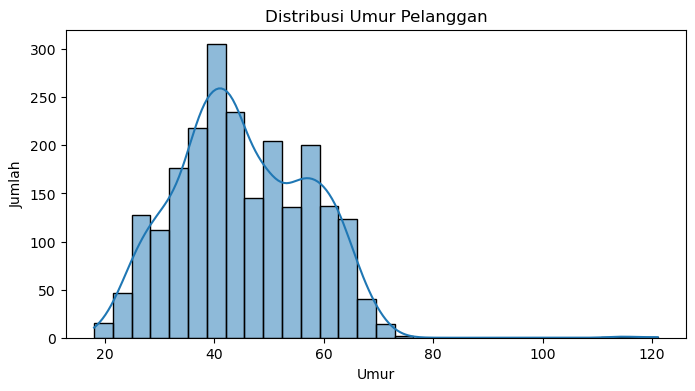

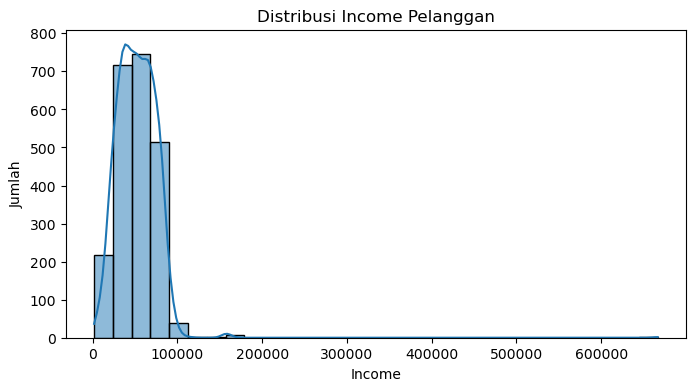

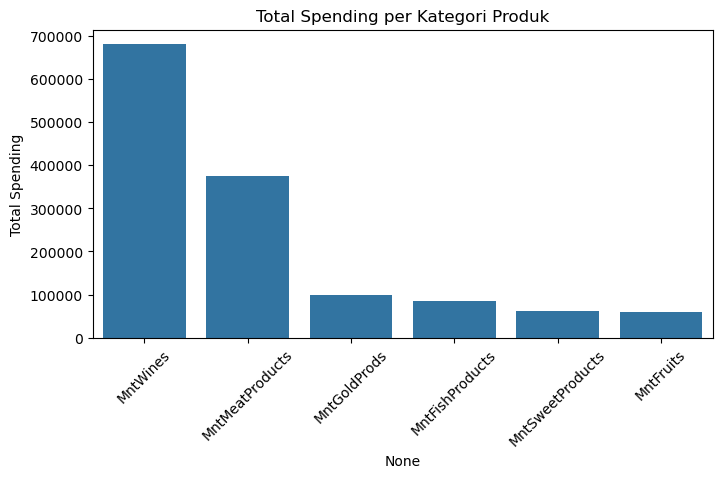

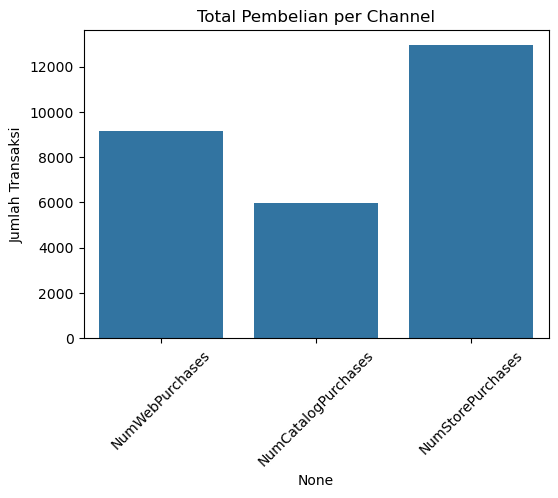

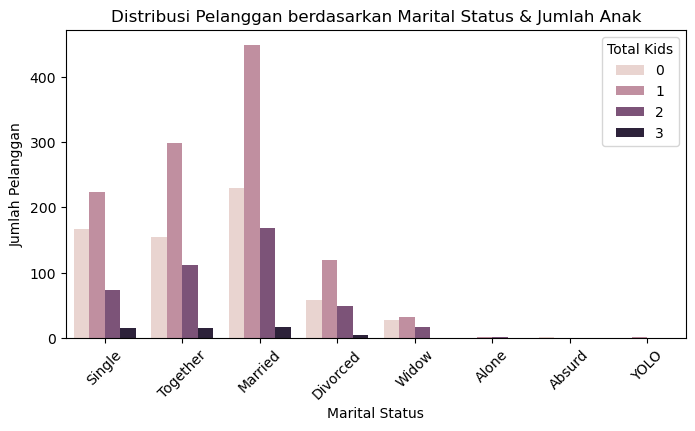

In [13]:
# Buat kolom Age dari Year_Birth
df['Age'] = 2014 - df['Year_Birth']

#1. Distribusi umur pelanggan
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribusi Umur Pelanggan")
plt.xlabel("Umur")
plt.ylabel("Jumlah")
plt.show()

# Distribusi Income
plt.figure(figsize=(8,4))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title("Distribusi Income Pelanggan")
plt.xlabel("Income")
plt.ylabel("Jumlah")
plt.show()

#Distribusi Spending per kategori
spending_cols = ['MntWines','MntFruits','MntMeatProducts',
                 'MntFishProducts','MntSweetProducts','MntGoldProds']
df_spending = df[spending_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=df_spending.index, y=df_spending.values)
plt.title("Total Spending per Kategori Produk")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.show()

# Channel Pembelian
channels = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
df_channels = df[channels].sum()

plt.figure(figsize=(6,4))
sns.barplot(x=df_channels.index, y=df_channels.values)
plt.title("Total Pembelian per Channel")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.show()

# Distribusi berdasarkan Marital Status dan jumlah anak
df['TotalKids'] = df['Kidhome'] + df['Teenhome']

plt.figure(figsize=(8,4))
sns.countplot(x='Marital_Status', hue='TotalKids', data=df)
plt.title("Distribusi Pelanggan berdasarkan Marital Status & Jumlah Anak")
plt.xlabel("Marital Status")
plt.ylabel("Jumlah Pelanggan")
plt.legend(title="Total Kids")
plt.xticks(rotation=45)
plt.show()

Data Analysis

In [14]:
#define family type
df['TotalKids'] = df['Kidhome'] + df['Teenhome']

def classify_family(row):
    if row['Marital_Status'] in ['Single', 'Divorced', 'Widow', 'Alone']:
        if row['TotalKids'] == 0:
            return 'Single without kids'
        else:
            return 'Single with kids'
    elif row['Marital_Status'] in ['Married', 'Together']:
        if row['TotalKids'] == 0:
            return 'Couple without kids'
        else:
            return 'Couple with kids'
    else:
        return 'Others'

df['Family_Type'] = df.apply(classify_family, axis=1)

print(df['Family_Type'].value_counts())


Family_Type
Couple with kids       1060
Single with kids        540
Couple without kids     384
Single without kids     252
Others                    4
Name: count, dtype: int64


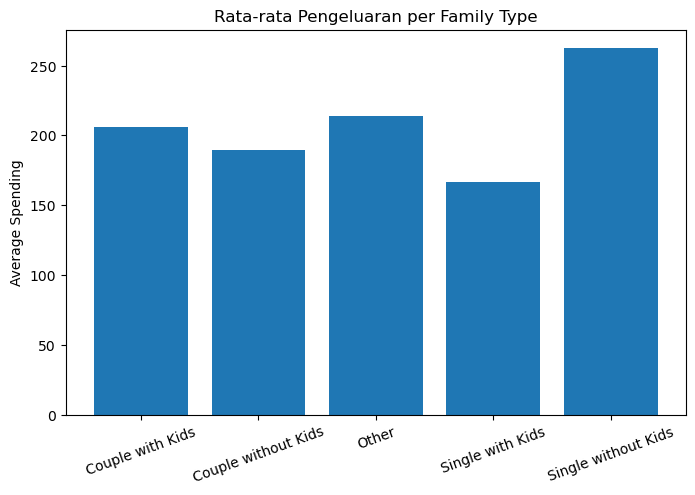

,Family_Type,Customers,Avg_Income,Avg_Spending,Avg_Recency
0,Couple with Kids,436,40073.172018,206.089450,48.174312
1,Couple without Kids,55,31703.163636,189.727273,49.163636
2,Other,501,40129.115768,213.918164,49.708583
3,Single with Kids,230,37277.502174,166.434783,48.591304
4,Single without Kids,38,35722.697368,262.447368,47.236842


In [16]:
def family_type(row):
    if row["Marital_Status"] == "Single" and row["Kidhome"] == 0 and row["Teenhome"] == 0:
        return "Single without Kids"
    elif row["Marital_Status"] == "Single":
        return "Single with Kids"
    elif row["Marital_Status"] == "Married" and (row["Kidhome"] + row["Teenhome"]) == 0:
        return "Couple without Kids"
    elif row["Marital_Status"] == "Married":
        return "Couple with Kids"
    else:
        return "Other"

df_clean["Family_Type"] = df_clean.apply(family_type, axis=1)
# Average income & average spending
spending_cols = ["MntWines", "MntFruits", "MntMeatProducts",
                 "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df_clean["Total_Spending"] = df_clean[spending_cols].sum(axis=1)

family_analysis = df_clean.groupby("Family_Type").agg(
    Customers=("ID", "count"),
    Avg_Income=("Income", "mean"),
    Avg_Spending=("Total_Spending", "mean"),
    Avg_Recency=("Recency", "mean")
).reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(family_analysis["Family_Type"], family_analysis["Avg_Spending"])
plt.title("Rata-rata Pengeluaran per Family Type")
plt.ylabel("Average Spending")
plt.xticks(rotation=20)
plt.show()

family_analysis

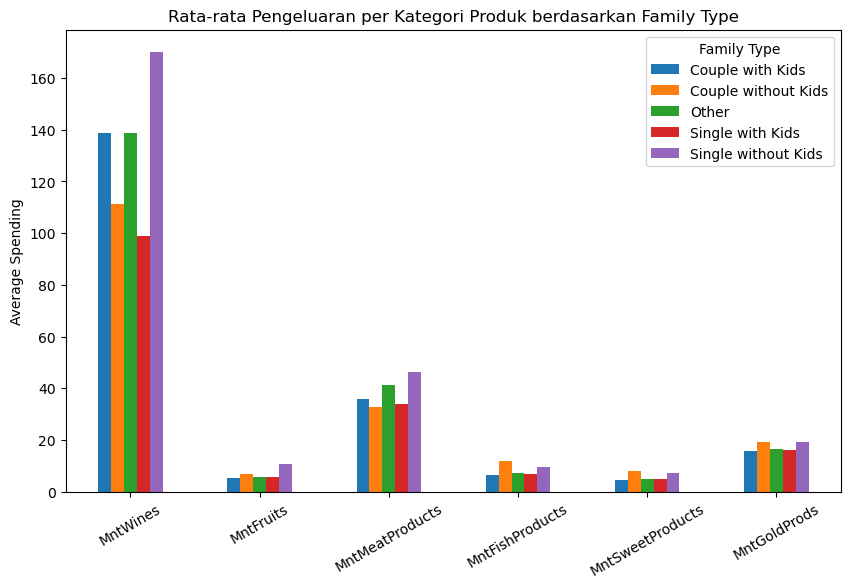

,Family_Type,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Couple with Kids,138.655963,5.158257,35.704128,6.493119,4.360092,15.717890
1,Couple without Kids,111.309091,6.654545,32.690909,11.927273,8.000000,19.145455
2,Other,138.706587,5.650699,41.139721,7.075848,4.828343,16.516966
3,Single with Kids,98.739130,5.778261,33.978261,6.908696,4.752174,16.278261
4,Single without Kids,170.157895,10.605263,46.184211,9.342105,7.052632,19.105263


In [17]:
# Rata-rata pengeluaran per kategori berdasarkan Family Type
product_analysis = df_clean.groupby("Family_Type")[
    ["MntWines", "MntFruits", "MntMeatProducts",
     "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
].mean().reset_index()

product_analysis.set_index("Family_Type").T.plot(kind="bar", figsize=(10,6))
plt.title("Rata-rata Pengeluaran per Kategori Produk berdasarkan Family Type")
plt.ylabel("Average Spending")
plt.xticks(rotation=30)
plt.legend(title="Family Type")
plt.show()

product_analysis

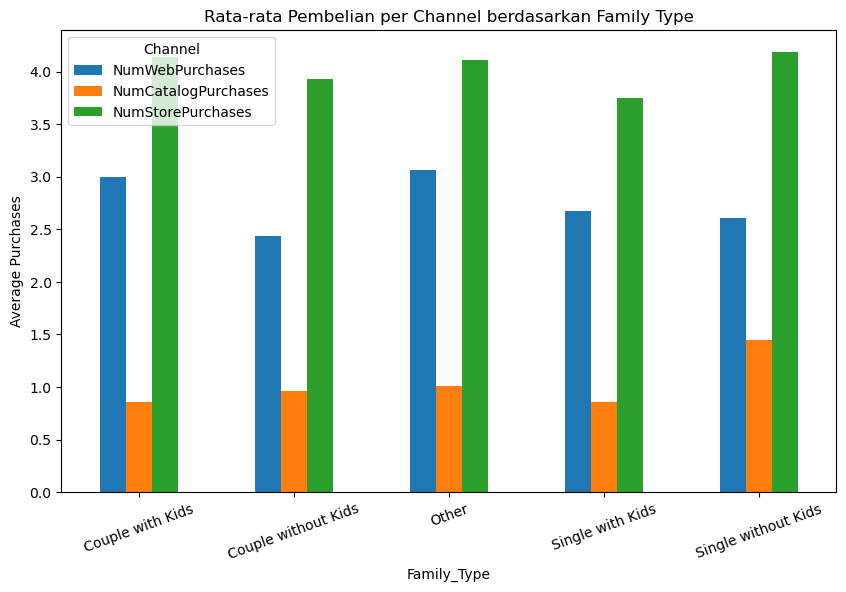

,Family_Type,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth
0,Couple with Kids,2.997706,0.853211,4.135321,2.543578,6.422018
1,Couple without Kids,2.436364,0.963636,3.927273,1.072727,6.200000
2,Other,3.067864,1.013972,4.113772,2.461078,6.327345
3,Single with Kids,2.678261,0.856522,3.747826,2.478261,6.478261
4,Single without Kids,2.605263,1.447368,4.184211,1.552632,6.052632


In [18]:
# Channel Pembelian per Family Type 

channel_analysis = df_clean.groupby("Family_Type")[
    ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumDealsPurchases", "NumWebVisitsMonth"]
].mean().reset_index()


channel_analysis.set_index("Family_Type")[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].plot(
    kind="bar", figsize=(10,6)
)
plt.title("Rata-rata Pembelian per Channel berdasarkan Family Type")
plt.ylabel("Average Purchases")
plt.xticks(rotation=20)
plt.legend(title="Channel")
plt.show()

channel_analysis

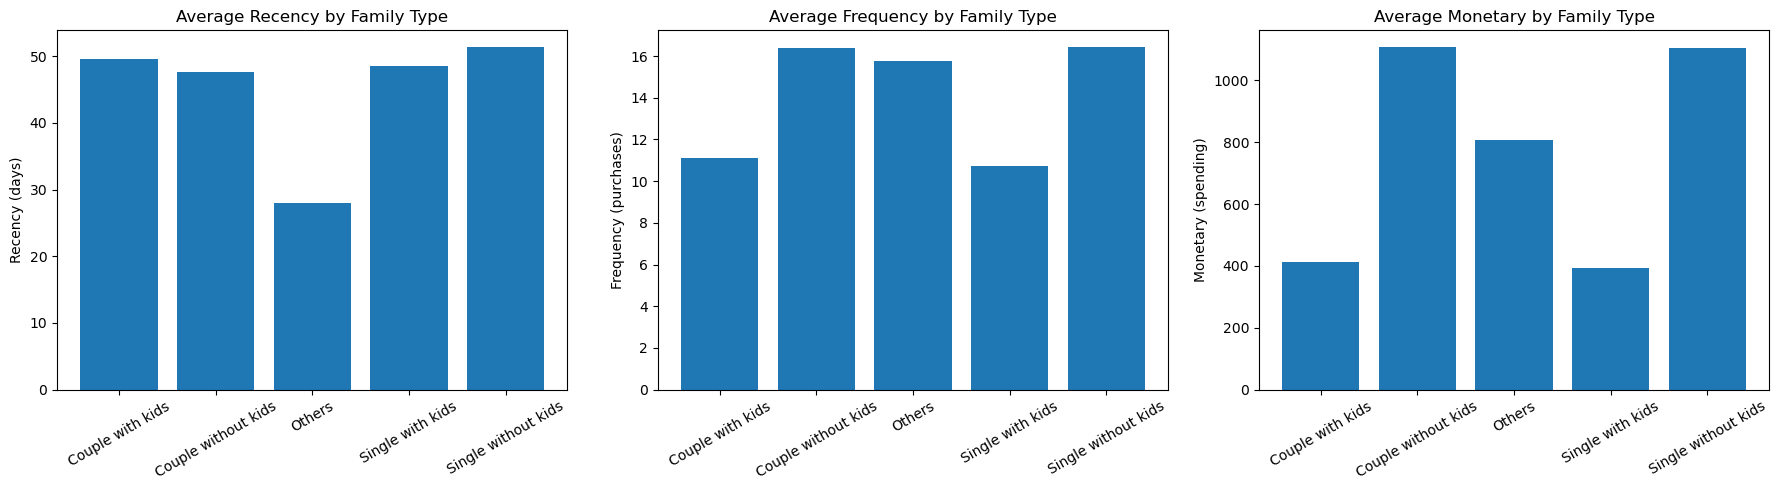

In [19]:
# Hitung RFM
df["Frequency"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]
df["Monetary"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

# Hitung rata-rata RFM per Family_Type
rfm_by_family = df.groupby("Family_Type")[["Recency", "Frequency", "Monetary"]].mean().reset_index()

# Plot bar chart untuk setiap metrik RFM
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency
axes[0].bar(rfm_by_family["Family_Type"], rfm_by_family["Recency"])
axes[0].set_title("Average Recency by Family Type")
axes[0].set_ylabel("Recency (days)")
axes[0].tick_params(axis='x', rotation=30)

# Frequency
axes[1].bar(rfm_by_family["Family_Type"], rfm_by_family["Frequency"])
axes[1].set_title("Average Frequency by Family Type")
axes[1].set_ylabel("Frequency (purchases)")
axes[1].tick_params(axis='x', rotation=30)

# Monetary
axes[2].bar(rfm_by_family["Family_Type"], rfm_by_family["Monetary"])
axes[2].set_title("Average Monetary by Family Type")
axes[2].set_ylabel("Monetary (spending)")
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()